In [ ]:
!pip install yfinance
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 878 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GRU
import tensorflow as tf
import yfinance as yf  
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
df = yf.download('GOOGL','2015-01-01','2020-01-01', period="20d")

[*********************100%***********************]  1 of 1 completed


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,26.629999,26.790001,26.393999,26.477501,26.477501,26480000
2015-01-05,26.357500,26.399500,25.887501,25.973000,25.973000,41182000
2015-01-06,26.025000,26.060499,25.277500,25.332001,25.332001,54456000
2015-01-07,25.547501,25.574499,25.182501,25.257500,25.257500,46918000
2015-01-08,25.075500,25.375000,24.750999,25.345501,25.345501,73054000
...,...,...,...,...,...,...
2019-12-24,67.510498,67.600502,67.208504,67.221497,67.221497,13468000
2019-12-26,67.327499,68.160004,67.275497,68.123497,68.123497,23662000
2019-12-27,68.199997,68.352501,67.650002,67.732002,67.732002,23212000


Text(0, 0.5, 'Adj Close')

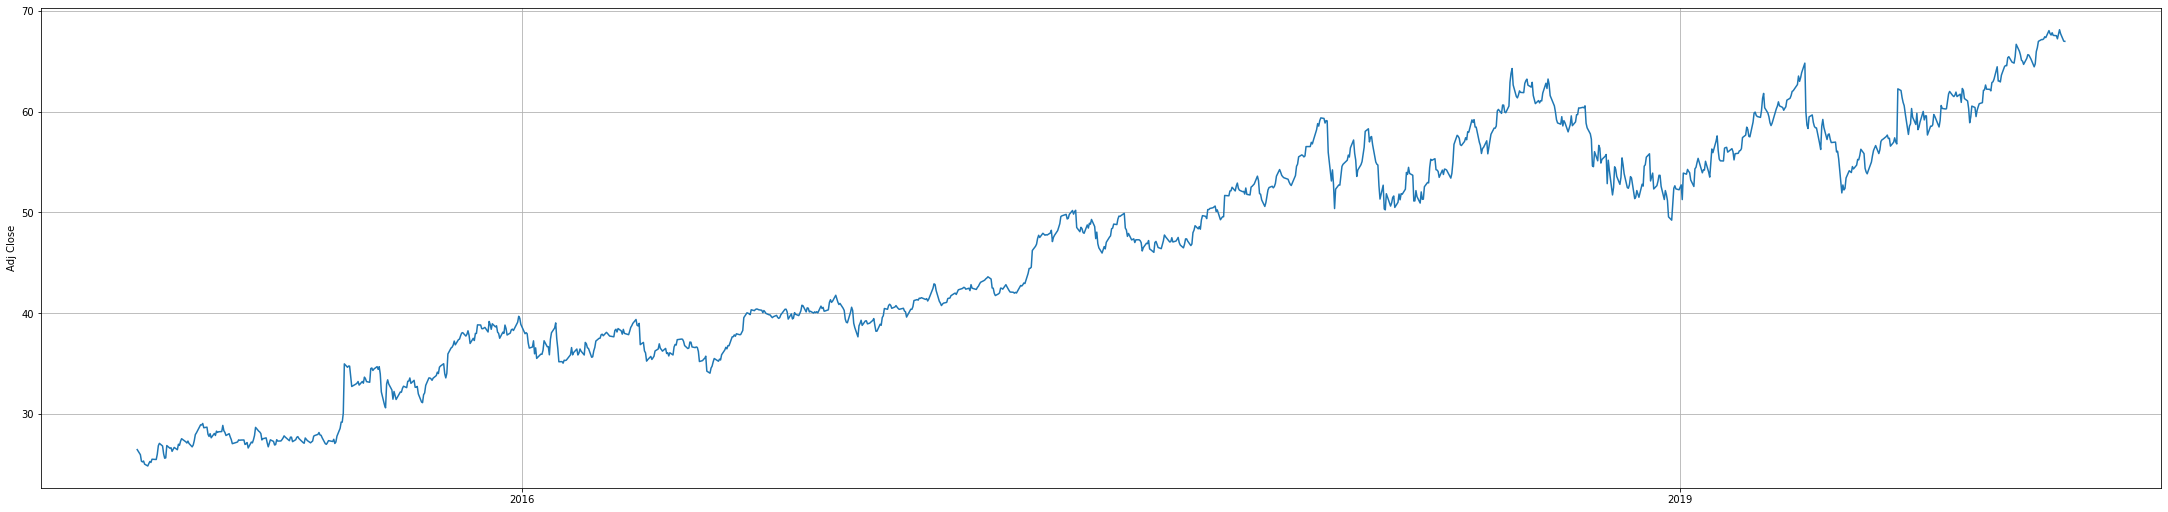

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
fig, ax = plt.subplots(1, figsize=(30, 7), constrained_layout=True)
ax.plot(df.index, df['Adj Close'])
ax.xaxis.set_major_locator(mdates.YearLocator(3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.grid(True)
ax.set_ylabel('Adj Close')

ADF Statistic: -0.817085
p-value: 0.814052
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


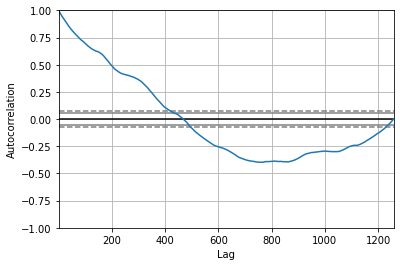

In [ ]:
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Adj Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

autocorrelation_plot(df['Open'])
pyplot.show()

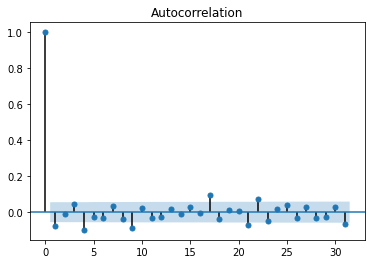

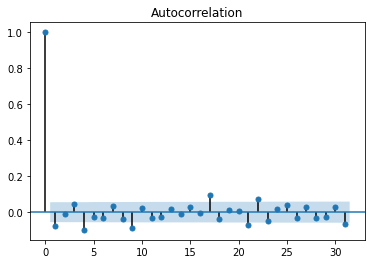

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df.Open.diff().dropna())

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import time

X = df['Adj Close'].values
size = int(len(X) * 0.80)
history = list(X[:size])
test = X[size:]
predictions = list()
start_time = time.time()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(1,1,1))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	history = history[-20:]
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
end_time = time.time()
rmse = sqrt(mean_squared_error(test, predictions))
print("Total time taken:", end_time-start_time)
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes

predicted=52.224706, expected=52.734001
predicted=52.561366, expected=51.273499
predicted=51.562063, expected=53.903500
predicted=53.314533, expected=53.796001


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=53.234334, expected=54.268501
predicted=53.704498, expected=54.082500
predicted=53.655984, expected=53.941502
predicted=53.620063, expected=53.223499
predicted=53.043980, expected=52.575500
predicted=52.519836, expected=54.325500
predicted=53.959779, expected=54.475498
predicted=54.185369, expected=54.956001
predicted=54.631208, expected=55.365002
predicted=55.071835, expected=53.931499
predicted=54.159902, expected=54.220501
predicted=54.301635, expected=54.200001
predicted=54.252893, expected=55.075500
predicted=54.745289, expected=53.993000
predicted=54.247889, expected=53.502998
predicted=53.872729, expected=54.899502
predicted=54.504249, expected=56.294498
predicted=55.638236, expected=55.931000
predicted=55.489666, expected=57.070999
predicted=56.693062, expected=57.593498
predicted=57.425886, expected=56.144501
predicted=56.077764, expected=55.295502
predicted=55.281904, expected=55.118999
predicted=55.248554, expected=55.105999
predicted=54.977105, expected=56.379002


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=62.931910, expected=63.215000
predicted=63.191168, expected=64.448997
predicted=64.493166, expected=63.033001
predicted=63.215053, expected=63.035000
predicted=63.077249, expected=62.939999
predicted=62.981891, expected=63.612499
predicted=63.403339, expected=64.480499
predicted=64.430680, expected=64.571999
predicted=64.585347, expected=64.550499
predicted=64.542970, expected=65.347000
predicted=65.253209, expected=65.449997
predicted=65.473268, expected=64.914001
predicted=64.970247, expected=64.860497
predicted=64.891337, expected=64.808998
predicted=64.826326, expected=65.457497
predicted=65.374216, expected=66.677002
predicted=66.609019, expected=65.991997
predicted=65.976644, expected=65.629501
predicted=65.662367, expected=65.093002
predicted=65.191311, expected=65.007004
predicted=65.088009, expected=64.683502
predicted=64.593292, expected=65.281998
predicted=65.449819, expected=65.650002
predicted=65.653832, expected=65.606499
predicted=65.591641, expected=65.204498


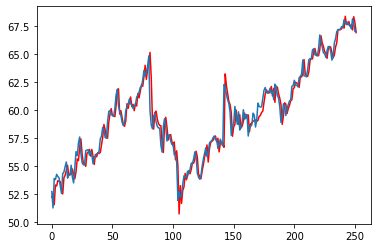

In [ ]:
pyplot.plot(predictions,c='r')
pyplot.plot(test)